In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
from scipy.optimize import curve_fit
import scipy as sp
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

%matplotlib inline

In [16]:
df = pd.read_csv("Data/boston_corrected_raw.csv")
df2 = pd.read_csv("Data/boston.csv")
df

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,91,1801,-70.9860,42.2312,22.4,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,91,1802,-70.9910,42.2275,20.6,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,91,1803,-70.9948,42.2260,23.9,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,91,1804,-70.9875,42.2240,22.0,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [17]:
df_MO= df[['TOWN', 'TOWNNO', 'LON', 'LAT','CRIM']]

In [19]:
df_MO.TOWN.value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Wenham                1
Sherborn              1
Hamilton              1
Topsfield             1
Lincoln               1
Name: TOWN, Length: 92, dtype: int64

In [20]:
list(df)

['TOWN',
 'TOWNNO',
 'TRACT',
 'LON',
 'LAT',
 'MEDV',
 'CMEDV',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [21]:
from shapely.geometry import Point, Polygon

In [22]:
geometry= [Point(xy) for xy in zip(df_MO.LON, df_MO.LAT)]

Text(0, 0.5, 'Latitude')

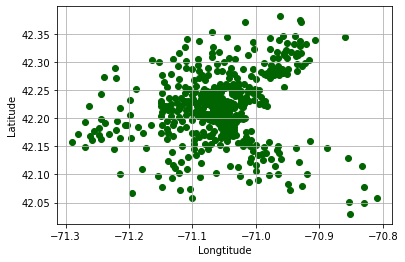

In [9]:
lo=list(np.array(df['LON']))
la=list(np.array(df['LAT']))

plt.grid()
plt.scatter(lo, la, c='darkgreen')
plt.xlabel('Longtitude')
plt.ylabel('Latitude')

<AxesSubplot:>

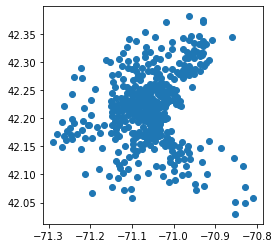

In [23]:
geometry = [Point(xy) for xy in zip(lo,la)]
geodata=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry)
geodata.plot()


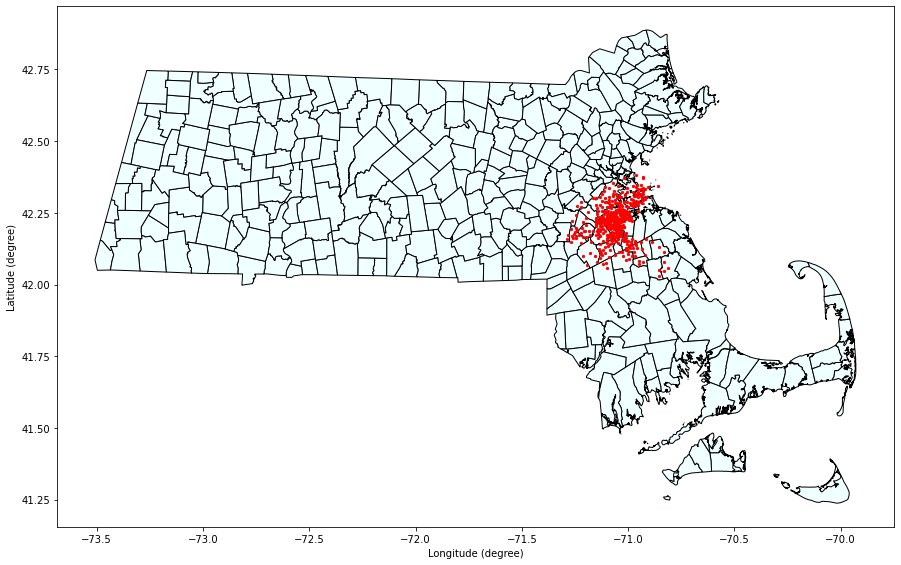

In [24]:
boston = gpd.read_file('Data/ReCoordinate13/ReCoordinate15.shp')

fig,ax = plt.subplots(figsize = (15,15))
boston.plot(ax=ax, facecolor='#F0FFFF', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(ax=ax, color='red', markersize=5);
ax.set_xlabel('Longitude (degree)', fontsize=10)
ax.set_ylabel('Latitude (degree)', fontsize=10)

plt.savefig('Data/Graph/Mass.png')

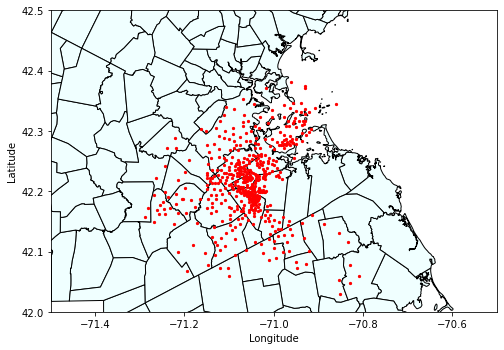

In [12]:
boston = gpd.read_file('Data/ReCoordinate13/ReCoordinate15.shp')

fig,ax = plt.subplots(figsize = (8,8))
boston.plot(ax=ax, facecolor='#F0FFFF', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(ax=ax, color='red', markersize=5);

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
plt.savefig('Data/Graph/Boston.png')

# geo_df = gpd.GeoDataFrame(geometry = geometry)
# g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Boston')
# plt.show()

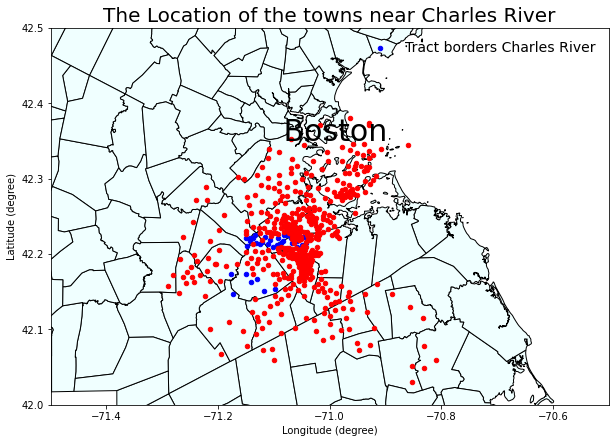

In [26]:
geometry = [Point(xy) for xy in zip(lo,la)]
df_TownNO= list(np.array(df['CHAS']))

lo1=[]
la1=[]
lo2=[]
la2=[]

count=0
for i in df_TownNO:
    if i==1:
        lo1.append(lo[count])
        la1.append(la[count])
        count+=1
        
    if i==0:
        lo2.append(lo[count])
        la2.append(la[count])
        count+=1
            
geometry_1 = [Point(xy) for xy in zip(lo1,la1)]
geometry_2 = [Point(xy) for xy in zip(lo2,la2)]

geodata1=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_1)
geodata2=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_2)


fig,ax = plt.subplots(figsize = (10,10))
boston.plot(ax=ax, facecolor='#F0FFFF', edgecolor='k',alpha=1, linewidth=1)
geodata1.plot(ax=ax, color='blue', markersize=20, label='Tract borders Charles River')
geodata2.plot(ax=ax, color='red', markersize=20)

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude (degree)', fontsize=10)
ax.set_ylabel('Latitude (degree)', fontsize=10)
ax.legend(loc='upper right', frameon=False, fontsize=14)
ax.text(0.4, 0.7, ' Boston ', transform = ax.transAxes, color ='black', fontsize = 30) 
ax.set_title('The Location of the towns near Charles River', fontsize=20)

plt.savefig('Data/Graph/Location.png')

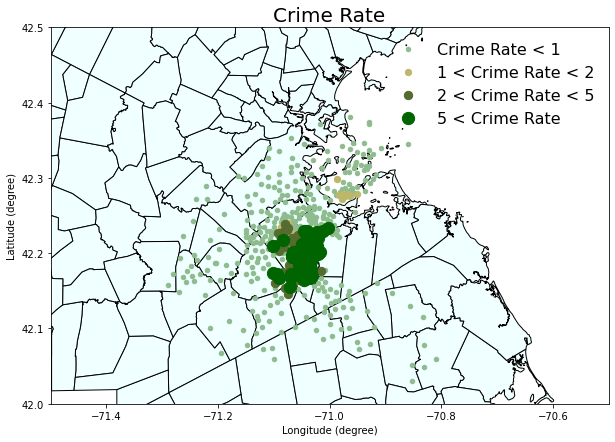

In [27]:
# crime rate
geometry = [Point(xy) for xy in zip(lo,la)]
df_CRIM= list(np.array(df['CRIM']))

lo11=[]
la11=[]
lo22=[]
la22=[]
lo33=[]
la33=[]
lo44=[]
la44=[]

# <1, 1-2, 2-5, >5
count=0
for i in df_CRIM:
    if i<1:
        lo11.append(lo[count])
        la11.append(la[count])
        count+=1

    
    if i>1 and i<2:
        lo22.append(lo[count])
        la22.append(la[count])
        count+=1
    
    if i>2 and i<5:
        lo33.append(lo[count])
        la33.append(la[count])
        count+=1
    
    if i>5:
        lo44.append(lo[count])
        la44.append(la[count])
        count+=1
            
geometry_11 = [Point(xy) for xy in zip(lo11,la11)]
geometry_22 = [Point(xy) for xy in zip(lo22,la22)]
geometry_33 = [Point(xy) for xy in zip(lo33,la33)]
geometry_44 = [Point(xy) for xy in zip(lo44,la44)]

geodata11=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_11)
geodata22=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_22)
geodata33=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_33)
geodata44=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_44)

fig,ax = plt.subplots(figsize = (10,10))
boston.plot(ax=ax, facecolor='#F0FFFF', edgecolor='k',alpha=1, linewidth=1)
geodata11.plot(ax=ax, color='#8FBC8F', markersize=20, label='Crime Rate < 1')
geodata22.plot(ax=ax, color='#BDB76B', markersize=40, label='1 < Crime Rate < 2')
geodata33.plot(ax=ax, color='#556B2F', markersize=70, label='2 < Crime Rate < 5')
geodata44.plot(ax=ax, color='#006400', markersize=150, label='5 < Crime Rate')

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude (degree)', fontsize=10)
ax.set_ylabel('Latitude (degree)', fontsize=10)
ax.legend(loc='upper right', frameon=False, fontsize=16)
ax.set_title('Crime Rate', fontsize=20)

plt.savefig('Data/Graph/CrimeRate.png')

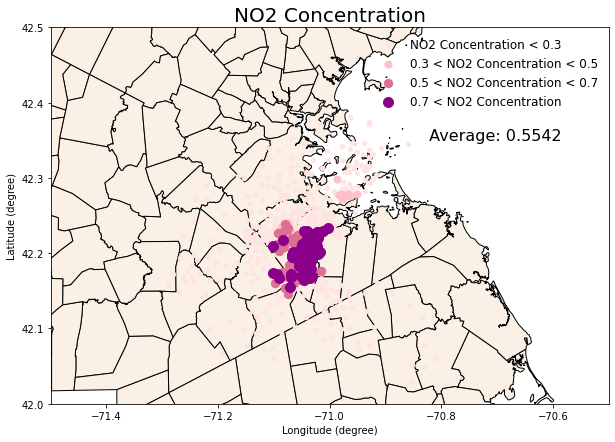

In [337]:
# nitric oxides concentration
geometry = [Point(xy) for xy in zip(lo,la)]
df_CRIM= list(np.array(df['NOX']))


lo111=[]
la111=[]
lo222=[]
la222=[]
lo333=[]
la333=[]
lo444=[]
la444=[]

# 0.3 0.5 0.7
count=0
for i in df_CRIM:
    if i<0.3:
        lo111.append(lo[count])
        la111.append(la[count])
        count+=1

    
    if i>0.3 and i<0.5:
        lo222.append(lo[count])
        la222.append(la[count])
        count+=1
    
    if i>0.5 and i<0.7:
        lo333.append(lo[count])
        la333.append(la[count])
        count+=1
    
    if i>0.7:
        lo444.append(lo[count])
        la444.append(la[count])
        count+=1
            
geometry_111 = [Point(xy) for xy in zip(lo11,la11)]
geometry_222 = [Point(xy) for xy in zip(lo22,la22)]
geometry_333 = [Point(xy) for xy in zip(lo33,la33)]
geometry_444 = [Point(xy) for xy in zip(lo44,la44)]

geodata11=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_111)
geodata22=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_222)
geodata33=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_333)
geodata44=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_444)

fig,ax = plt.subplots(figsize = (10,10))
boston.plot(ax=ax, facecolor='#FAF0E6', edgecolor='k',alpha=1, linewidth=1)
geodata11.plot(ax=ax, color='#FFE4E1', markersize=20, label='NO2 Concentration < 0.3')
geodata22.plot(ax=ax, color='#FFC0CB', markersize=50, label='0.3 < NO2 Concentration < 0.5')
geodata33.plot(ax=ax, color='#DB7093', markersize=70, label='0.5 < NO2 Concentration < 0.7')
geodata44.plot(ax=ax, color='#8B008B', markersize=100, label='0.7 < NO2 Concentration')

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude (degree)', fontsize=10)
ax.set_ylabel('Latitude (degree)', fontsize=10)
ax.legend(loc='upper right', frameon=False, fontsize=12)
ax.text(0.67, 0.7, ' Average: 0.5542 ', transform = ax.transAxes, color ='black', fontsize = 16) 
ax.set_title('NO2 Concentration', fontsize=20)

plt.savefig('Data/Graph/NO2 Concentration.png')  

17.025
21.2
25.0
22.528853754940712


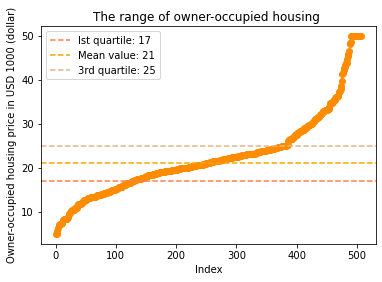

In [329]:
#House Pricing
df_CMEDV= list(np.array(df['CMEDV']))
df_CMEDV_sorted= np.array(sorted(df_CMEDV))
index= np.linspace(1,506,506)

#calculate quartiles 
a= np.percentile(df_CMEDV_sorted, 25)
b= np.percentile(df_CMEDV_sorted, 50)
c= np.percentile(df_CMEDV_sorted, 75)

plt.xlabel('Index') 
plt.ylabel('Owner-occupied housing price in USD 1000 (dollar)') 
plt.title('The range of owner-occupied housing ') 
plt.plot(index, df_CMEDV_sorted,'o', color='#FF8C00')

print(a)
print(b)
print(c)

#line for quartiles 
plt.axhline(y = a, color = '#FF7F50', linestyle = '--', label='lst quartile: 17') 
plt.axhline(y = b, color = 'orange', linestyle = '--', label='Mean value: 21') 
plt.axhline(y = c, color = '#DEB887', linestyle = '--', label='3rd quartile: 25' ) 
plt.legend(loc="upper left")

average=np.mean(df_CMEDV_sorted)
print(average)
plt.savefig('Data/Graph/The range of owner-occupied housing.png')


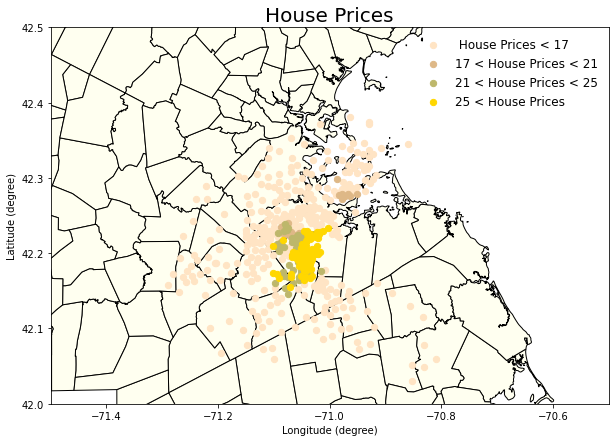

In [334]:
# House Prices 
geometry = [Point(xy) for xy in zip(lo,la)]

lo1111=[]
la1111=[]
lo2222=[]
la2222=[]
lo3333=[]
la3333=[]
lo4444=[]
la4444=[]

# 17 21 25
count=0
for i in df_CMEDV:
    if i<17:
        lo1111.append(lo[count])
        la1111.append(la[count])
        count+=1

    
    if i>17 and i<21:
        lo2222.append(lo[count])
        la2222.append(la[count])
        count+=1
    
    if i>21 and i<25:
        lo3333.append(lo[count])
        la3333.append(la[count])
        count+=1
    
    if i>25:
        lo4444.append(lo[count])
        la4444.append(la[count])
        count+=1
            
geometry_1111 = [Point(xy) for xy in zip(lo11,la11)]
geometry_2222 = [Point(xy) for xy in zip(lo22,la22)]
geometry_3333 = [Point(xy) for xy in zip(lo33,la33)]
geometry_4444 = [Point(xy) for xy in zip(lo44,la44)]

geodata11=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_1111)
geodata22=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_2222)
geodata33=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_3333)
geodata44=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_4444)

fig,ax = plt.subplots(figsize = (10,10))
boston.plot(ax=ax, facecolor='#FFFFF0', edgecolor='k',alpha=1, linewidth=1)
geodata11.plot(ax=ax, color='#FFE4C4', markersize=40, label=' House Prices < 17')
geodata22.plot(ax=ax, color='#DEB887', markersize=40, label='17 < House Prices < 21')
geodata33.plot(ax=ax, color='#BDB76B', markersize=40, label='21 < House Prices < 25')
geodata44.plot(ax=ax, color='#FFD700', markersize=40, label='25 < House Prices ')

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude (degree)', fontsize=10)
ax.set_ylabel('Latitude (degree)', fontsize=10)
ax.legend(loc='upper right', frameon=False, fontsize=12)
ax.set_title('House Prices', fontsize=20)

plt.savefig('Data/Graph/House Prices in different areas.png')

17.4
19.05
20.2


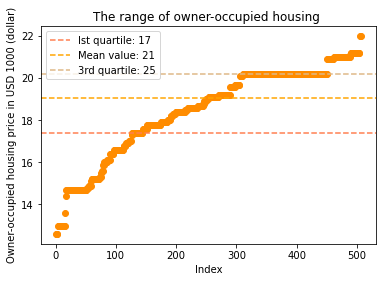

In [290]:
# pupil-teacher ratios per town (constant for all Boston tracts)
df_PTRATIO= list(np.array(df['PTRATIO']))
df_PTRATIO_sorted= np.array(sorted(df_PTRATIO))
index= np.linspace(1,506,506)

#calculate quartiles 
a= np.percentile(df_PTRATIO_sorted, 25)
b= np.percentile(df_PTRATIO_sorted, 50)
c= np.percentile(df_PTRATIO_sorted, 75)

plt.xlabel('Index') 
plt.ylabel('Owner-occupied housing price in USD 1000 (dollar)') 
plt.title('The range of owner-occupied housing ') 
plt.plot(index, df_PTRATIO_sorted,'o', color='#FF8C00')

print(a)
print(b)
print(c)

#line for quartiles 
plt.axhline(y = a, color = '#FF7F50', linestyle = '--', label='lst quartile: 17') 
plt.axhline(y = b, color = 'orange', linestyle = '--', label='Mean value: 21') 
plt.axhline(y = c, color = '#DEB887', linestyle = '--', label='3rd quartile: 25' ) 
plt.legend(loc="upper left")





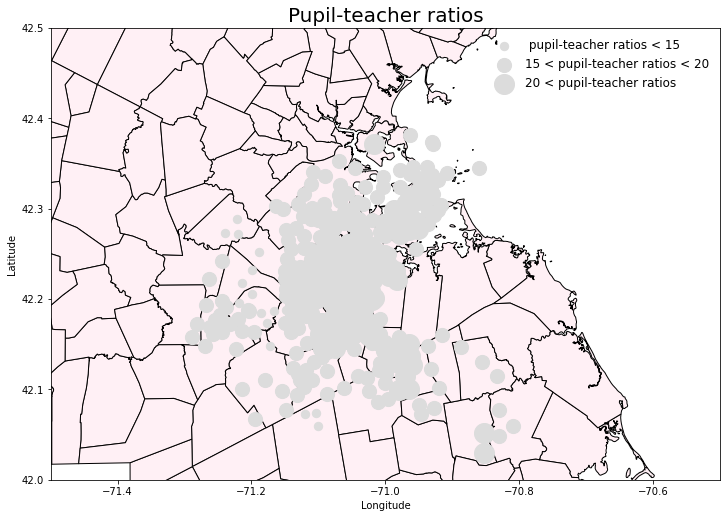

In [333]:
# pupil-teacher ratios per town (constant for all Boston tracts)
geometry = [Point(xy) for xy in zip(lo,la)]
df_DIS= list(np.array(df['PTRATIO']))

lo_a=[]
la_a=[]
lo_b=[]
la_b=[]
lo_c=[]
la_c=[]


# 15 20 20>
count=0
for i in df_DIS:
    if i<15:
        lo_a.append(lo[count])
        la_a.append(la[count])
        count+=1

    
    if i>15 and i<20:
        lo_b.append(lo[count])
        la_b.append(la[count])
        count+=1
    
    if i>20:
        lo_c.append(lo[count])
        la_c.append(la[count])
        count+=1
    
            
geometry_a = [Point(xy) for xy in zip(lo_a,la_a)]
geometry_b = [Point(xy) for xy in zip(lo_b,la_b)]
geometry_c = [Point(xy) for xy in zip(lo_c,la_c)]


geodataa=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_a)
geodatab=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_b)
geodatac=gpd.GeoDataFrame(crs='EPSG:4326', geometry=geometry_c)

fig,ax = plt.subplots(figsize = (12,12))
boston.plot(ax=ax, facecolor='#FFF0F5', edgecolor='k',alpha=1, linewidth=1)
geodataa.plot(ax=ax, color='#DCDCDC', markersize=70, label=' pupil-teacher ratios < 15')
geodatab.plot(ax=ax, color='#DCDCDC', markersize=200, label='15 < pupil-teacher ratios < 20')
geodatac.plot(ax=ax, color='#DCDCDC', markersize=400, label='20 < pupil-teacher ratios ')

ax.set(xlim=(-71.5, -70.5), ylim=(42, 42.5))
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.legend(loc='upper right', frameon=False, fontsize=12)
ax.set_title('Pupil-teacher ratios', fontsize=20)

plt.savefig('Data/Graph/Pupil-teacher ratios.png')

In [ ]:
print(world)